In [70]:
# numpy를 가져오는 것은 기본이다.
import numpy as np  

# os  모듈을 로딩 하고 디렉토리 확인 
import os
print(os.getcwd())

C:\Users\ASUS\Desktop\deep-class\deep04\img-animal\img-animal


In [71]:
# 디렉토리 위치 바꾸기
# data_dir = os.chdir(os.getcwd() + "\img-animal")

In [72]:
import glob  # 
from glob import glob

# 파일이름을 리스트 형태로 변환 하는데 사용
data_list = glob('*.jpg')
data_list[1:5]

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [73]:
len(data_list)

4000

In [74]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(data_list[0])

['cat', '0', 'jpg']

In [75]:
label = []
for n, path in enumerate(data_list[:100]):
    token = text_to_word_sequence(data_list[n])
    label.append(token[0])

In [76]:
label[:10]

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']

In [77]:
from sklearn.preprocessing import LabelEncoder
items = label
encoder = LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)

In [78]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
encoder.inverse_transform(label) #라벨링한 것을 원본으로 변환하여 보여줌.

array(['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat'], dtype='<U3')

In [80]:
data_list[0]

'cat.0.jpg'

In [14]:
#!pip install opencv-python

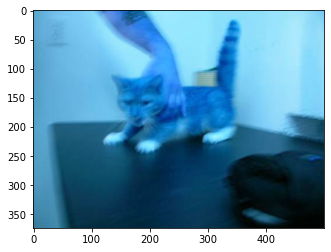

In [81]:
# cv2 모듈을 불러 온다. 
import cv2
from matplotlib import pyplot as plt

# 100번째 있는 사진의 샘플을 본다. 
img = cv2.imread(data_list[0])
plt.imshow(img)
plt.show()

In [82]:
# 이미지를 데이터 셋으로 변환 하고,  이것을 255로 나누어 0 ~ 1로 스케일 한다.
image = cv2.imread(data_list[0])/255
image.shape  #이미지마다 크기가 다 다르다.
# 세로 : 374, 가로 : 500픽셀, 칼라!(3)

(374, 500, 3)

In [83]:
image[0]

array([[0.34117647, 0.64313725, 0.79607843],
       [0.34117647, 0.64313725, 0.79607843],
       [0.34509804, 0.64705882, 0.8       ],
       ...,
       [0.47843137, 0.78823529, 0.94117647],
       [0.4745098 , 0.78431373, 0.9372549 ],
       [0.47058824, 0.78039216, 0.93333333]])

In [84]:
# 데이터 초기화 
data_height = 150
data_width = 150
channel_n = 3

In [85]:
# label 5개를 하였다고 가정하자 
images = np.zeros((5, data_height, data_width, channel_n)) 

In [86]:
images.shape #cnn 전처리용 데이터를 4차원으로 만들어주기 위해 일단, 
             #0으로 채워진 4차원을 만들어두자.

(5, 150, 150, 3)

In [87]:
for n, path in enumerate(data_list[:5]):
    image = cv2.imread(data_list[n]) #이미지를 읽어서
    print('image shape 변경 전 >> ', image.shape) 
    image = cv2.resize(image, (data_height, data_width)) #고정된 크기로 통일하자.
    print('image shape 변경 후 >> ', image.shape) 
    images[n, :, :, :] = image


image shape 변경 전 >>  (374, 500, 3)
image shape 변경 후 >>  (150, 150, 3)
image shape 변경 전 >>  (280, 300, 3)
image shape 변경 후 >>  (150, 150, 3)
image shape 변경 전 >>  (499, 489, 3)
image shape 변경 후 >>  (150, 150, 3)
image shape 변경 전 >>  (499, 403, 3)
image shape 변경 후 >>  (150, 150, 3)
image shape 변경 전 >>  (149, 150, 3)
image shape 변경 후 >>  (150, 150, 3)


In [88]:
images.shape

(5, 150, 150, 3)

In [89]:
images[0]

array([[[ 87., 164., 203.],
        [ 92., 169., 208.],
        [ 93., 170., 209.],
        ...,
        [123., 206., 247.],
        [120., 203., 244.],
        [122., 201., 240.]],

       [[ 87., 164., 203.],
        [ 92., 169., 208.],
        [ 93., 170., 209.],
        ...,
        [124., 207., 245.],
        [121., 204., 245.],
        [122., 201., 240.]],

       [[ 87., 164., 203.],
        [ 92., 169., 208.],
        [ 93., 170., 209.],
        ...,
        [127., 208., 246.],
        [125., 206., 244.],
        [124., 203., 242.]],

       ...,

       [[ 54., 124., 157.],
        [ 55., 125., 158.],
        [ 57., 126., 160.],
        ...,
        [  0.,   4.,   3.],
        [  0.,   4.,   3.],
        [  0.,   2.,   2.]],

       [[ 56., 123., 154.],
        [ 57., 124., 155.],
        [ 60., 126., 158.],
        ...,
        [  0.,   2.,   2.],
        [  0.,   2.,   2.],
        [  0.,   2.,   2.]],

       [[ 54., 121., 152.],
        [ 55., 122., 153.],
        [ 58., 1

In [90]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2

In [91]:
# image initialization
data_height = 150
data_width = 150
channel_n = 3
batch_size = len(data_list)

In [92]:
# data processing 함수 
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [93]:
def make_file(data_height, data_width, channel_n, batch_size):
    label = []
    images = np.zeros((batch_size, data_height, data_width, channel_n))
    for n, path in enumerate(data_list[:batch_size]):

    # lable 
        token = text_to_word_sequence(data_list[n])
        label.append(token[0])
        
    # image transform
        image = cv2.imread(data_list[n])
        image = cv2.resize(image, (data_height, data_width))/255
        images[n, :, :, :] =image
    
    label = np.array(label)
        
    return (label, images)

In [94]:
# 함수를 이용하여 라벨과 이미지 데이터셋을 가져오기 
(label, images) = make_file(data_height, data_width, channel_n, batch_size)

# 이미지 데이터 구조와 라벨 구조를 보기
print(images.shape, label.shape)

(4000, 150, 150, 3) (4000,)


In [95]:
images[0][:10]

array([[[0.34117647, 0.64313725, 0.79607843],
        [0.36078431, 0.6627451 , 0.81568627],
        [0.36470588, 0.66666667, 0.81960784],
        ...,
        [0.48235294, 0.80784314, 0.96862745],
        [0.47058824, 0.79607843, 0.95686275],
        [0.47843137, 0.78823529, 0.94117647]],

       [[0.34117647, 0.64313725, 0.79607843],
        [0.36078431, 0.6627451 , 0.81568627],
        [0.36470588, 0.66666667, 0.81960784],
        ...,
        [0.48627451, 0.81176471, 0.96078431],
        [0.4745098 , 0.8       , 0.96078431],
        [0.47843137, 0.78823529, 0.94117647]],

       [[0.34117647, 0.64313725, 0.79607843],
        [0.36078431, 0.6627451 , 0.81568627],
        [0.36470588, 0.66666667, 0.81960784],
        ...,
        [0.49803922, 0.81568627, 0.96470588],
        [0.49019608, 0.80784314, 0.95686275],
        [0.48627451, 0.79607843, 0.94901961]],

       ...,

       [[0.35294118, 0.63921569, 0.81176471],
        [0.36470588, 0.65098039, 0.82352941],
        [0.37647059, 0

In [96]:
# data label encoder
from sklearn.preprocessing import LabelEncoder
items = label
encoder = LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)

In [97]:
# data split train set, test set
from sklearn.model_selection import train_test_split
x = images 
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=55)

# 데이터 셋이  나누어진 것에 대한 구조보기
print(X_train.shape, X_test.shape)

(3200, 150, 150, 3) (800, 150, 150, 3)


In [98]:
# CNN model network
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, channel_n)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [99]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [100]:
from tensorflow import keras

early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best-animalCNN-model.h5')

#X_train, X_test, y_train, y_test

cnn_history = model.fit(X_train, y_train, 
                             batch_size=128, 
                             epochs=20,
                             validation_data=(X_test, y_test),
                             callbacks = [ checkpoint, early_stopping],
                             verbose=2)

Epoch 1/20
25/25 - 33s - loss: 0.9564 - accuracy: 0.4903 - val_loss: 0.6850 - val_accuracy: 0.5400 - 33s/epoch - 1s/step
Epoch 2/20
25/25 - 31s - loss: 0.6733 - accuracy: 0.5903 - val_loss: 0.6261 - val_accuracy: 0.6637 - 31s/epoch - 1s/step
Epoch 3/20
25/25 - 33s - loss: 0.6253 - accuracy: 0.6603 - val_loss: 0.5892 - val_accuracy: 0.6800 - 33s/epoch - 1s/step
Epoch 4/20
25/25 - 33s - loss: 0.5407 - accuracy: 0.7422 - val_loss: 0.5588 - val_accuracy: 0.7113 - 33s/epoch - 1s/step
Epoch 5/20
25/25 - 31s - loss: 0.4628 - accuracy: 0.7912 - val_loss: 0.5454 - val_accuracy: 0.7275 - 31s/epoch - 1s/step
Epoch 6/20
25/25 - 31s - loss: 0.3946 - accuracy: 0.8281 - val_loss: 0.5438 - val_accuracy: 0.7275 - 31s/epoch - 1s/step
Epoch 7/20
25/25 - 33s - loss: 0.3132 - accuracy: 0.8684 - val_loss: 0.6078 - val_accuracy: 0.7163 - 33s/epoch - 1s/step
Epoch 8/20
25/25 - 34s - loss: 0.2614 - accuracy: 0.8991 - val_loss: 0.6053 - val_accuracy: 0.7138 - 34s/epoch - 1s/step
Epoch 9/20
25/25 - 34s - loss: 0

In [64]:
#history = model.fit(X_train, y_train, validation_data=(X_test,y_test),
#                                                       batch_size=128,
#                                                       epochs=20)

Epoch 1/20
22/22 [==============================] - 46s 2s/step - loss: 0.8930 - accuracy: 0.4896 - val_loss: 0.7134 - val_accuracy: 0.4792
Epoch 2/20
22/22 [==============================] - 39s 2s/step - loss: 0.6950 - accuracy: 0.5182 - val_loss: 0.6929 - val_accuracy: 0.5192
Epoch 3/20
22/22 [==============================] - 39s 2s/step - loss: 0.6889 - accuracy: 0.5614 - val_loss: 0.6817 - val_accuracy: 0.5933
Epoch 4/20
22/22 [==============================] - 37s 2s/step - loss: 0.6501 - accuracy: 0.6268 - val_loss: 0.7015 - val_accuracy: 0.5717
Epoch 5/20
22/22 [==============================] - 37s 2s/step - loss: 0.6038 - accuracy: 0.6807 - val_loss: 0.7036 - val_accuracy: 0.6267
Epoch 6/20
22/22 [==============================] - 38s 2s/step - loss: 0.5684 - accuracy: 0.7046 - val_loss: 0.6743 - val_accuracy: 0.6492
Epoch 7/20
22/22 [==============================] - 37s 2s/step - loss: 0.4694 - accuracy: 0.7696 - val_loss: 0.6334 - val_accuracy: 0.6825
Epoch 8/20
22/22 [==

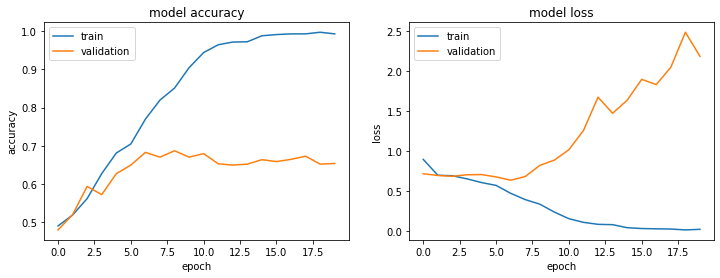

In [65]:
# model chart
# plt.figure(figsize=(12,4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['train', 'validation'])

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend(['train', 'validation'])

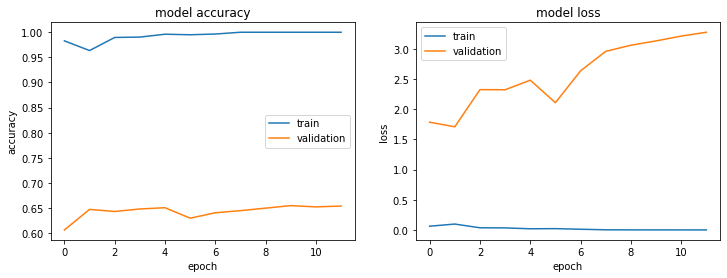

In [69]:
# model chart => 컨볼루션 레이어를 너무 많이 주어서 오버피팅.
# plt.figure(figsize=(12,4))
# plt.subplot(1, 2, 1)
# plt.plot(cnn_history.history['accuracy'])
# plt.plot(cnn_history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['train', 'validation'])

# plt.subplot(1, 2, 2)
# plt.plot(cnn_history.history['loss'])
# plt.plot(cnn_history.history['val_loss'])
# plt.title('model loss')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend(['train', 'validation'])

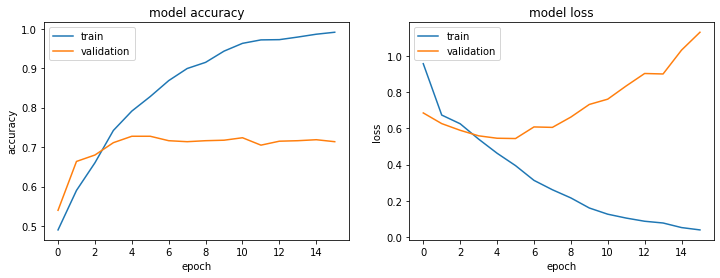

In [101]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])